<a href="https://colab.research.google.com/github/aaakashkumar/Ozone-Level-Detection/blob/master/DSDA_Project_%E2%80%94_Ozone_Level_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Ozone Layer Detection

In this notebook, we use three methods to analyze the [Ozone Level Detection dataset, obtained from UCI](https://archive.ics.uci.edu/ml/datasets/Ozone+Level+Detection).



*   Support Vector Machine
*   K-Nearest Neighbour
*   Multilayer Perceptron Feed-Forward Network



In [ ]:
# get the files

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/eighthr.names

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/ozone/onehr.names
  
!wget https://github.com/aaakashkumar/Ozone-Level-Detection/raw/master/eighthr.csv

## Imports

It's a good idea to make all the necessary imports in the beginning of the notebook. However, we make imports catering to the specific methods in their respective sections, for clarity.

In [2]:
import pandas as pd
import numpy as np

## Data Cleanup

The dataset contains 2536 rows of values, and 73 attributes. Out of these, 687 rows contain missing values represented as "`?`''.

The `eighthr.data` was converted to CSV using [OpenRefine](http://openrefine.org/), and respective column names were added from `eighthr.names` file.

Here we read the csv file and replace the missing values (`?`) by row means.

In [3]:
df = pd.read_csv('eighthr.csv')
df_original = pd.read_csv('eighthr.csv')

### Examining the dataset
It's a good idea to get to know the data a little bit before working with it.

In [4]:
print(df.shape)
df.head()

(2534, 74)


,Date,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,1/1/1998,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,1/2/1998,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,1/3/1998,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,1/4/1998,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,1/5/1998,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,...,?,?,?,?,?,?,?,?,0.58,0


We'll print out a quick summary of a few useful statistics on each column.

This will include things like mean, standard deviation, max, min, and various quantiles.

In [5]:
df.describe()

,Result
count,2534.000000
mean,0.063141
std,0.243265
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


We remove the `Date` column, as it is not useful for prediction. 

In [6]:
df.drop(columns='Date', inplace=True)

In [7]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,?,?,?,?,?,?,?,?,0.58,0


### Replace missing values using [Imputer](https://sklearn.org/modules/generated/sklearn.preprocessing.Imputer.html)

In [8]:
df.replace(to_replace='?', value=np.nan, inplace=True)

In [9]:
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2,2.1,1.5,1.7,1.9,2.3,...,0.15,10.67,-1.56,5795,-12.1,17.9,10330,-55,0,0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.48,8.39,3.84,5805,14.05,29,10275,-55,0,0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.6,6.94,9.8,5790,17.9,41.3,10235,-40,0,0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.49,8.73,10.54,5775,31.15,51.7,10195,-40,2.08,0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.58,0


We store the target to be predicted in Y

In [10]:
# Splitting the dataset into feature(X) and target(Y)
X = df.iloc[:,:-1].values
Y = df.iloc[:,-1].values

In [11]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

In [12]:
df = pd.DataFrame(imputer.fit_transform(df), dtype='float64')
df.columns = ['WSR0','WSR1','WSR2','WSR3','WSR4','WSR5','WSR6','WSR7','WSR8','WSR9','WSR10','WSR11','WSR12','WSR13','WSR14','WSR15','WSR16','WSR17','WSR18','WSR19','WSR20','WSR21','WSR22','WSR23','WSR_PK','WSR_AV','T0','T1','T2','T3','T4','T5','T6','T7','T8','T9','T10','T11','T12','T13','T14','T15','T16','T17','T18','T19','T20','T21','T22','T23','T_PK','T_AV','T85','RH85','U85','V85','HT85','T70','RH70','U70','V70','HT70','T50','RH50','U50','V50','HT50','KI','TT','SLP','SLP_','Precp','Result']
df.head()

,WSR0,WSR1,WSR2,WSR3,WSR4,WSR5,WSR6,WSR7,WSR8,WSR9,...,RH50,U50,V50,HT50,KI,TT,SLP,SLP_,Precp,Result
0,0.8,1.8,2.4,2.1,2.0,2.1,1.5,1.7,1.9,2.3,...,0.150000,10.670000,-1.560000,5795.000000,-12.100000,17.900000,10330.000000,-55.000000,0.00,0.0
1,2.8,3.2,3.3,2.7,3.3,3.2,2.9,2.8,3.1,3.4,...,0.480000,8.390000,3.840000,5805.000000,14.050000,29.000000,10275.000000,-55.000000,0.00,0.0
2,2.9,2.8,2.6,2.1,2.2,2.5,2.5,2.7,2.2,2.5,...,0.600000,6.940000,9.800000,5790.000000,17.900000,41.300000,10235.000000,-40.000000,0.00,0.0
3,4.7,3.8,3.7,3.8,2.9,3.1,2.8,2.5,2.4,3.1,...,0.490000,8.730000,10.540000,5775.000000,31.150000,51.700000,10195.000000,-40.000000,2.08,0.0
4,2.6,2.1,1.6,1.4,0.9,1.5,1.2,1.4,1.3,1.4,...,0.304716,9.872418,0.830116,5818.821222,10.511051,37.388335,10164.198442,-0.119949,0.58,0.0


In [13]:
# check if NaN values exist
if np.nan in df['T_PK'].values.tolist():
  print("NaN values found")
else:
  print("No NaN values found")

No NaN values found


In [14]:
# Cleaning data using Imputer Class
X = imputer.fit_transform(X)

## Standardization

(array([690., 623., 686., 234., 173.,  70.,  25.,  22.,  10.,   1.]),
 array([-0.2103052 , -0.20975903, -0.20921287, -0.2086667 , -0.20812054,
        -0.20757437, -0.20702821, -0.20648204, -0.20593588, -0.20538971,
        -0.20484355]),
 <a list of 10 Patch objects>)

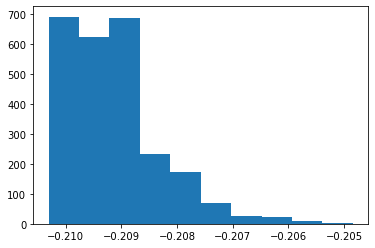

In [26]:
plt.hist(X[:,1])

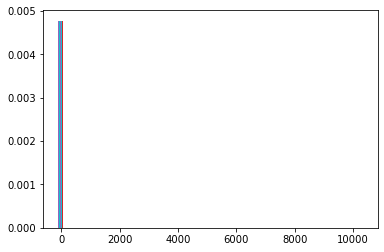

In [17]:
# import matplotlib.pyplot as plt
count,bins,ig=plt.hist(X,bins=50,density=True)
plt.show()

In [25]:
X=(X-np.mean(X))/np.std(X)

Now, we split the data into two parts — train and test.

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size=0.2, random_state=9)

## Data Visualization

In [28]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

### Peak Temperatures plot

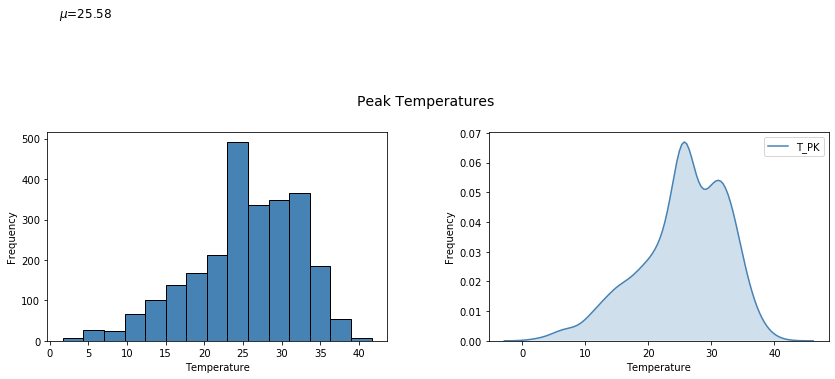

In [29]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak Temperatures", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Temperature")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['T_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['T_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Temperature")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='steelblue')

### Peak Wind Speed Plots

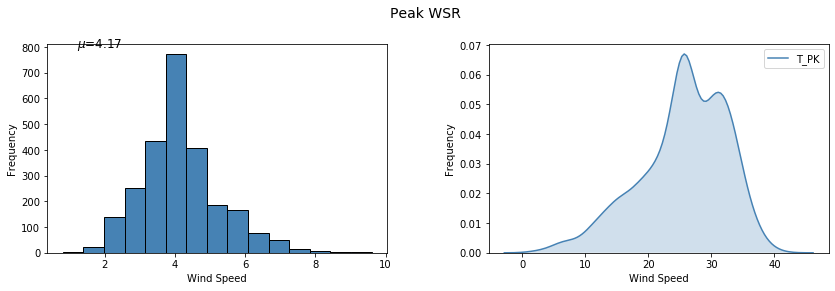

In [30]:
fig = plt.figure(figsize = (14,4))
title = fig.suptitle("Peak WSR", fontsize=14)
fig.subplots_adjust(top=0.85, wspace=0.3)

# Histogram
ax = fig.add_subplot(1,2, 1)
ax.set_xlabel("Wind Speed")
ax.set_ylabel("Frequency") 
ax.text(1.2, 800, r'$\mu$='+str(round(df['WSR_PK'].mean(),2)), 
         fontsize=12)
freq, bins, patches = ax.hist(df['WSR_PK'], color='steelblue', bins=15,
                                    edgecolor='black', linewidth=1)


# Density Plot
ax1 = fig.add_subplot(1,2, 2)
ax1.set_xlabel("Wind Speed")
ax1.set_ylabel("Frequency") 
sns.kdeplot(df['T_PK'], ax=ax1, shade=True, color='steelblue')

### Correlation Matrix

Here we depict the pair-wise correlation matrix as a heatmap, for a few attributes of the dataset

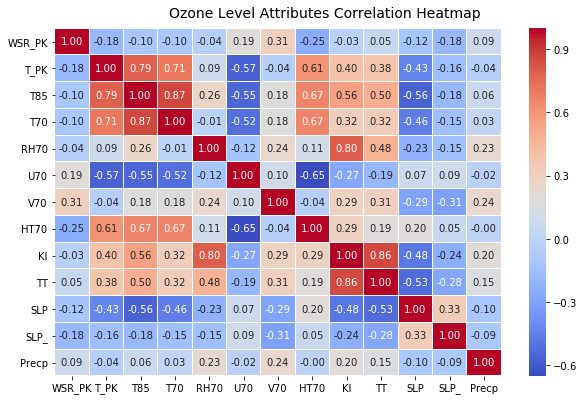

In [31]:
# Correlation Matrix Heatmap
f, ax = plt.subplots(figsize=(10, 6))
subset_attributes = ['WSR_PK','T_PK','T85','T70','RH70','U70','V70','HT70','KI','TT','SLP','SLP_','Precp']
corr = df[subset_attributes].corr()
hm = sns.heatmap(round(corr,2), annot=True, ax=ax, cmap="coolwarm",fmt='.2f',
                 linewidths=.05)
f.subplots_adjust(top=0.93)
t= f.suptitle('Ozone Level Attributes Correlation Heatmap', fontsize=14)

### Factorplot

Here we try to establish a relation between peak temperature and the result.

In [32]:
df['ozone_label'] = df['Result'].apply(lambda value: 'Non Ozone Day' if value == 0 else 'Ozone Day')
df['ozone_label'] = pd.Categorical(df['ozone_label'], categories=['Non Ozone Day', 'Ozone Day'])

c:\users\anirban\appdata\local\programs\python\python37\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


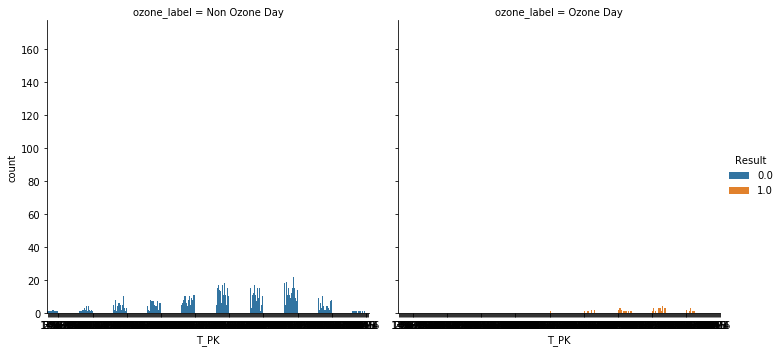

In [33]:
# Visualizing 3-D categorical data using bar plots
# leveraging the concepts of hue and facets
fc = sns.factorplot(x="T_PK", hue="Result", col="ozone_label", 
                    data=df, kind="count")

## Using Support Vector Machine

### Generating Model

In [34]:
# Import svm model
from sklearn import svm

# Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

# Train the model using the training sets
clf.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = clf.predict(X_test)

### Evaluating the Model

In [35]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9428007889546351


In [0]:
# Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9487179487179487


## Using K Nearest Neighbors

### Generating Model

In [36]:
# Import knearest neighbors Classifier model
from sklearn.neighbors import KNeighborsClassifier

# Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Train the model using the training sets
knn.fit(X_train, Y_train)

# Predict the response for test dataset
Y_pred = knn.predict(X_test)

### Model Evaluation

In [0]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(Y_test, Y_pred))

Accuracy: 0.9368836291913215


## Using Deep Neural Network

We use [Keras](https://keras.io/) to implement the Neural Network model.

In [ ]:
# imports
import keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization

Using TensorFlow backend.


Before feeding the data into the model, we standardise it. 

The StandardScaler assumes that the data is normally distributed within each feature and will scale them such that the distribution is now centred around 0, with a standard deviation of 1.

The mean and standard deviation are calculated for the feature and then the feature is scaled based on:

\begin{align*}
  \left(\frac{xi–mean(x)}{stdev(x)}\right)
\end{align*}

In [0]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test  = sc.transform(X_test)

The following code defines the model. There are 72 nodes in the input layer, followed by 100 and 50 nodes in the hidden layers, both followed by a ReLU activation unit, and then an output layer followed by Sigmoid activation.

In [0]:
# Initializer that generates tensors with a normal distribution
initializer = keras.initializers.RandomNormal(mean=0.0, stddev=0.05, seed=42)

# Define model
model = Sequential()
model.add(Dense(100, kernel_initializer=initializer, input_dim=72, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(50, kernel_initializer=initializer, activation= "relu"))
model.add(BatchNormalization())
model.add(Dense(1, kernel_initializer=initializer, activation= "sigmoid"))

# Print model Summary
model.summary() 

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 100)               7300      
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_2 (Dense)              (None, 50)                5050      
_________________________________________________________________
batch_normalization_2 (Batch (None, 50)                200       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 51        
Total params: 13,001
Trainable params: 12,701
Non-trainable params: 300
_________________________________________________________________


We calculate the Cross Entropy loss for this model, and print out the accuracy. The optimizer used is Adam, with a learning rate of 0.001.

In [0]:
# Set up the optimizer
adam = keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)

# Compile model
model.compile(loss="binary_crossentropy" , optimizer=adam, metrics=["accuracy"])

In [0]:
# Fit Model
history = model.fit(X_train, Y_train, validation_split=0.25, epochs=10, batch_size=16, verbose=1)

Instructions for updating:
Use tf.cast instead.
Train on 1520 samples, validate on 507 samples
Epoch 1/10
1520/1520 [==============================] - 4s 3ms/step - loss: 0.6123 - acc: 0.7401 - val_loss: 0.5324 - val_acc: 0.8343
Epoch 2/10
1520/1520 [==============================] - 1s 560us/step - loss: 0.4020 - acc: 0.8967 - val_loss: 0.2544 - val_acc: 0.9428
Epoch 3/10
1520/1520 [==============================] - 1s 647us/step - loss: 0.2219 - acc: 0.9434 - val_loss: 0.1754 - val_acc: 0.9527
Epoch 4/10
1520/1520 [==============================] - 1s 639us/step - loss: 0.1653 - acc: 0.9447 - val_loss: 0.1869 - val_acc: 0.9428
Epoch 5/10
1520/1520 [==============================] - 1s 640us/step - loss: 0.1476 - acc: 0.9461 - val_loss: 0.1477 - val_acc: 0.9408
Epoch 6/10
1520/1520 [==============================] - 1s 656us/step - loss: 0.1351 - acc: 0.9474 - val_loss: 0.1361 - val_acc: 0.9487
Epoch 7/10
1520/1520 [==============================] - 1s 654us/step - loss: 0.1263 - acc:

In [0]:
from sklearn.metrics import mean_squared_error

pred = model.predict(X_test)
score = np.sqrt(mean_squared_error(Y_test, pred))
print (score)

0.20346672651818298


### Keras Model Visualization

In [0]:
from keras.utils import plot_model
plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True)

![Model](https://raw.githubusercontent.com/aaakashkumar/Ozone-Level-Detection/master/model.png)

### Keras Training History Visualization

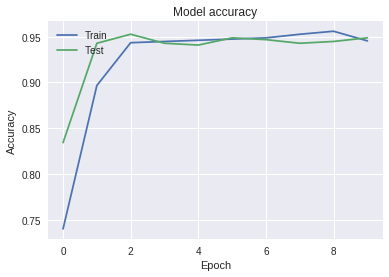

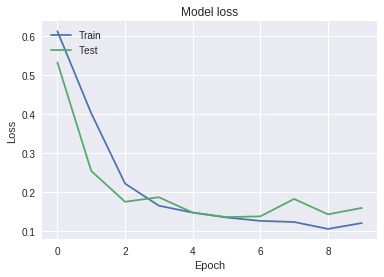

In [0]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

## Accuracies

SVM: 94.87%

KNN: 93.68%

DNN: 95.59%